In [2]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [3]:
# Load your data 
data = pd.read_csv("NFL data.csv")

In [4]:
# adding .head() to your dataset allows you to see the first rows in the dataset. 
# Add a # inside the brackets to specificy how many rows are returned or else 5 rows are returned.
print(data.shape)
# (12144, 18)
data.head()

(12144, 18)


,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,stadium_neutral,schedule_playoff,game_id
0,09/02/1966,1966,1,Miami Dolphins,Oakland Raiders,Orange Bowl,NaN,NaN,NaN,NaN,83.0,6.0,71,14,23,False,False,19660902OAKMIA
1,09/03/1966,1966,1,Houston Oilers,Denver Broncos,Rice Stadium,NaN,NaN,NaN,NaN,81.0,7.0,70,45,7,False,False,19660903DENTEN
2,09/04/1966,1966,1,San Diego Chargers,Buffalo Bills,Balboa Stadium,NaN,NaN,NaN,NaN,70.0,7.0,82,27,7,False,False,19660904BUFLAC
3,09/09/1966,1966,2,Miami Dolphins,New York Jets,Orange Bowl,NaN,NaN,NaN,NaN,82.0,11.0,78,14,19,False,False,19660909NYJMIA
4,09/10/1966,1966,1,Green Bay Packers,Baltimore Colts,Lambeau Field,NaN,NaN,NaN,64 degrees- humidity 62%- wind 8 mph,64.0,8.0,62,24,3,False,False,19660910INDGB


In [5]:
# check for the null values in each column
data.isna().sum()

schedule_date             0
schedule_season           0
schedule_week             0
team_home                 0
team_away                 0
stadium                 281
team_favorite_id       2479
spread_favorite        2479
over_under_line        2489
weather_detail         7719
weather_temperature     610
weather_wind_mph        610
weather_humidity       3778
score_home                0
score_away                0
stadium_neutral           0
schedule_playoff          0
game_id                 669
dtype: int64

In [6]:
# Gives you useful info about your data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        12144 non-null  object 
 1   schedule_season      12144 non-null  int64  
 2   schedule_week        12144 non-null  object 
 3   team_home            12144 non-null  object 
 4   team_away            12144 non-null  object 
 5   stadium              11863 non-null  object 
 6   team_favorite_id     9665 non-null   object 
 7   spread_favorite      9665 non-null   float64
 8   over_under_line      9655 non-null   object 
 9   weather_detail       4425 non-null   object 
 10  weather_temperature  11534 non-null  float64
 11  weather_wind_mph     11534 non-null  float64
 12  weather_humidity     8366 non-null   object 
 13  score_home           12144 non-null  int64  
 14  score_away           12144 non-null  int64  
 15  stadium_neutral      12144 non-null 

In [7]:
# Gives you summary statistics on your numeric columns
data.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,12144.000000,9665.000000,11534.000000,11534.000000,12144.000000,12144.000000
mean,1993.376565,-5.373099,58.416334,7.971216,22.307395,19.476861
std,14.754571,3.412725,15.543878,5.597581,10.573272,10.138413
min,1966.000000,-26.500000,-6.000000,0.000000,0.000000,0.000000
25%,1981.000000,-7.000000,48.000000,4.000000,14.000000,13.000000
50%,1994.000000,-4.500000,61.000000,8.000000,21.000000,19.000000
75%,2006.000000,-3.000000,72.000000,12.000000,29.000000,27.000000
max,2017.000000,0.000000,95.000000,40.000000,72.000000,62.000000


In [8]:
# return only rows where the year is greater than 2009
current = data[(data['schedule_season'] > 2009)]

In [9]:
#  no warning message and no exception is raised
pd.options.mode.chained_assignment = None  # default='warn'
# Create a column titled home or away. This column will add a 1 to the row where the New England Patriots played at home 
# and a 0 for away games.
current['home_or_away'] = np.where(current['team_home'] == 'New England Patriots', 1, 0)

In [10]:
# Return rows where New England Patriots are either the home or away team
current2 = current.loc[(current["team_home"] == "New England Patriots") | (current["team_away"] == "New England Patriots")]

# filter to certain columns
final = current2.filter(["team_home","team_away" , "score_home","score_away" ,"weather_temperature", "home_or_away", "over_under_line"])

# merge score_away & score_home into column 'score'
final['score'] = np.where(final['team_away'] == 'New England Patriots', final['score_away'], final['score_home'])


# Before showing our final dataset we will drop any rows with NA values.
final = final.dropna()
final.head()

,team_home,team_away,score_home,score_away,weather_temperature,home_or_away,over_under_line,score
10013,New England Patriots,Cincinnati Bengals,38,24,63.0,1,45,38
10034,New York Jets,New England Patriots,28,14,82.0,0,39.5,14
10049,New England Patriots,Buffalo Bills,38,30,68.0,1,43,38
10069,Miami Dolphins,New England Patriots,14,41,81.0,0,48,41
10089,New England Patriots,Baltimore Ravens,23,20,57.0,1,44.5,23


In [11]:
final['2_game_avg'] = final.score.rolling(window=2).mean()
final['5_game_avg'] = final.score.rolling(window=5).mean()

final.head()

,team_home,team_away,score_home,score_away,weather_temperature,home_or_away,over_under_line,score,2_game_avg,5_game_avg
10013,New England Patriots,Cincinnati Bengals,38,24,63.0,1,45,38,NaN,NaN
10034,New York Jets,New England Patriots,28,14,82.0,0,39.5,14,26.0,NaN
10049,New England Patriots,Buffalo Bills,38,30,68.0,1,43,38,26.0,NaN
10069,Miami Dolphins,New England Patriots,14,41,81.0,0,48,41,39.5,NaN
10089,New England Patriots,Baltimore Ravens,23,20,57.0,1,44.5,23,32.0,30.8


In [12]:
final = final.fillna(final.mean())

In [13]:
# This time we're checking for Outliers. Check each columns min & max to make sure the # is plausible
final.describe()

,score_home,score_away,weather_temperature,home_or_away,score,2_game_avg,5_game_avg
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,26.143885,23.848921,55.446043,0.532374,30.309353,30.271739,30.302222
std,10.895127,10.822624,16.795088,0.500755,9.915475,7.516195,5.245999
min,0.000000,0.000000,13.000000,0.000000,0.000000,13.000000,19.000000
25%,20.000000,17.000000,43.500000,0.000000,23.000000,25.500000,26.400000
50%,27.000000,23.000000,58.000000,1.000000,30.000000,30.500000,30.302222
75%,33.500000,31.000000,68.500000,1.000000,36.000000,35.250000,34.000000
max,59.000000,52.000000,89.000000,1.000000,59.000000,54.000000,43.800000


In [14]:
#  no warning message and no exception is raised
# pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
df = final[['weather_temperature', 'over_under_line','home_or_away', '2_game_avg','5_game_avg', 'score']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 10013 to 12143
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  139 non-null    float64
 1   over_under_line      139 non-null    object 
 2   home_or_away         139 non-null    int32  
 3   2_game_avg           139 non-null    float64
 4   5_game_avg           139 non-null    float64
 5   score                139 non-null    int64  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 7.1+ KB


In [17]:
# Need to convert three columns to  float64 Dtype
df['home_or_away'] = df['home_or_away'].astype('float64')
df['over_under_line'] = df['over_under_line'].astype('float64')
df['score'] = df['score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 10013 to 12143
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  139 non-null    float64
 1   over_under_line      139 non-null    float64
 2   home_or_away         139 non-null    float64
 3   2_game_avg           139 non-null    float64
 4   5_game_avg           139 non-null    float64
 5   score                139 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


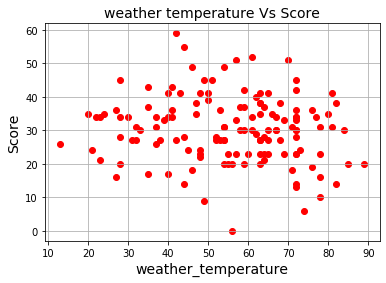

In [18]:
plt.scatter(df['weather_temperature'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

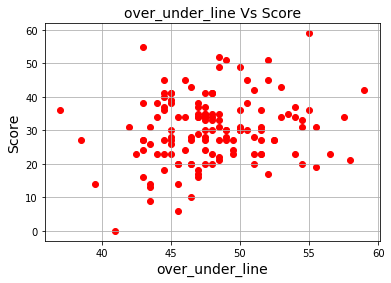

In [19]:
plt.scatter(df['over_under_line'], df['score'], color='red')
plt.title('over_under_line Vs Score', fontsize=14)
plt.xlabel('over_under_line', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

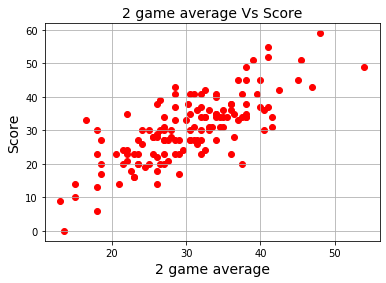

In [20]:
plt.scatter(df['2_game_avg'], df['score'], color='red')
plt.title('2 game average Vs Score', fontsize=14)
plt.xlabel('2 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

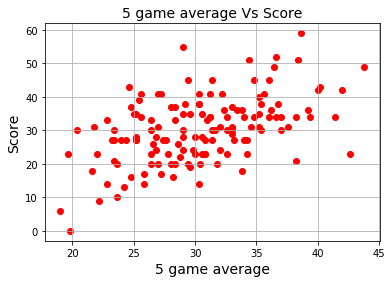

In [21]:
plt.scatter(df['5_game_avg'], df['score'], color='red')
plt.title('5 game average Vs Score', fontsize=14)
plt.xlabel('5 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

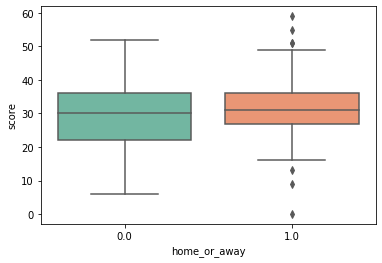

In [22]:
sns.boxplot(x ="home_or_away", y = "score", data = df, palette="Set2")

In [23]:
corr = df.corr()
corr

,weather_temperature,over_under_line,home_or_away,2_game_avg,5_game_avg,score
weather_temperature,1.000000,0.151726,-0.281754,-0.038930,-0.014621,-0.116059
over_under_line,0.151726,1.000000,-0.051578,0.207069,0.351153,0.178719
home_or_away,-0.281754,-0.051578,1.000000,0.081176,0.007282,0.135884
2_game_avg,-0.038930,0.207069,0.081176,1.000000,0.705033,0.756756
5_game_avg,-0.014621,0.351153,0.007282,0.705033,1.000000,0.497769
score,-0.116059,0.178719,0.135884,0.756756,0.497769,1.000000


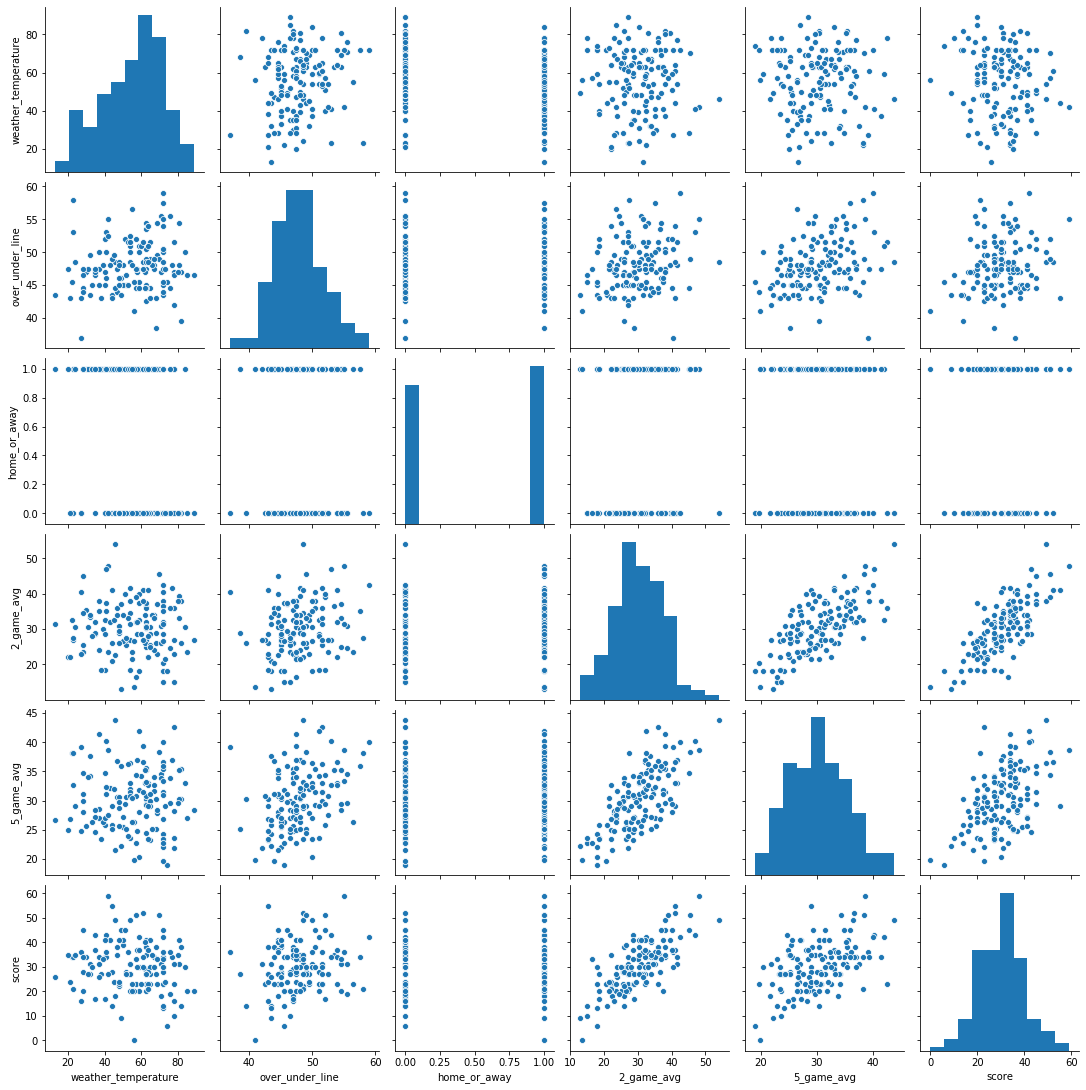

In [24]:
# More optional EDA
pairplot(df)

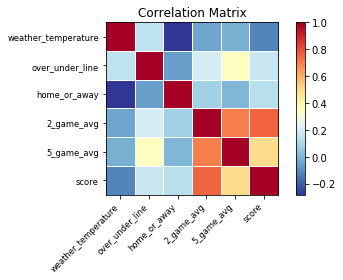

In [25]:
# More optional EDA
fig= plot_corr(corr,xnames=corr.columns)

In [26]:
X = pd.DataFrame(df, columns = ['2_game_avg', 'home_or_away'])
y = pd.DataFrame(df, columns=['score'])

# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       2_game_avg  home_or_away
12057        29.0           0.0
       2_game_avg  home_or_away
11099        25.0           0.0
       score
12057   23.0
       score
11099   30.0


In [27]:
# Create linear regression model
lin_reg_mod = LinearRegression()

# Fit linear regression
lin_reg_mod.fit(X_train, y_train)

# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [28]:
# Get the slope and intercept of the line best fit.
print(lin_reg_mod.intercept_)


print(lin_reg_mod.coef_)

[0.28286894]
[[0.94114075 2.43422985]]


In [29]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

6.765246575571149
0.5013209329837274


In [30]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['score']) - abs(df_results['Predicted'])
print(df_results)

       score  Predicted  Residuals
11099   30.0  23.811388   6.188612
10980   34.0  28.127899   5.872101
10704   49.0  51.104469  -2.104469
11694   35.0  34.715884   0.284116
10107   23.0  21.929106   1.070894
11343   28.0  29.069040  -1.069040
10488   41.0  35.575647   5.424353
10333   31.0  29.458232   1.541768
10991   34.0  32.281654   1.718346
11229   42.0  40.281351   1.718649
11310   17.0  27.575951 -10.575951
10234   34.0  30.869943   3.130057
11642   27.0  30.010180  -3.010180
11033   41.0  28.987662  12.012338
10760   34.0  38.480447  -4.480447
12046   35.0  34.715884   0.284116
11293   41.0  32.833603   8.166397
10910   27.0  27.105380  -0.105380
10612   31.0  41.774440 -10.774440
11502   20.0  24.833906  -4.833906
10593   52.0  38.869640  13.130360
10525   49.0  38.480447  10.519553
10565   18.0  27.186758  -9.186758
10299   35.0  37.068736  -2.068736
10935   55.0  41.303869  13.696131
11747   24.0  33.304173  -9.304173
10657   45.0  35.105077   9.894923
12109   37.0  32.833

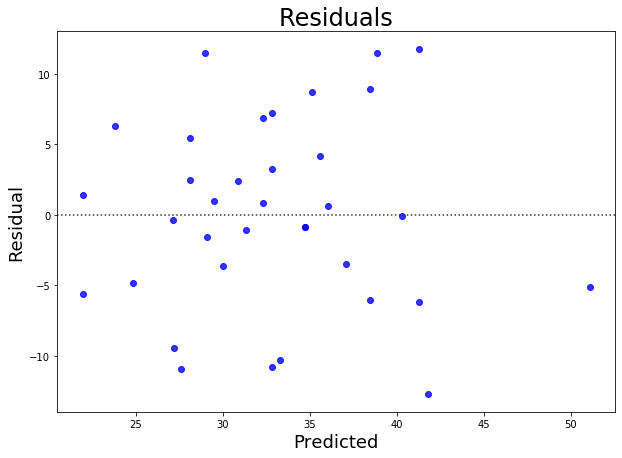

In [34]:
# Residual plot using df_result
fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "score",data = df_results, color='blue')

# Title and labels.
plt.title('Residuals', size=24)
plt.xlabel('Predicted', size=18)
plt.ylabel('Residual', size=18);

Text(0.5, 1, 'Actual vs. Predicted')

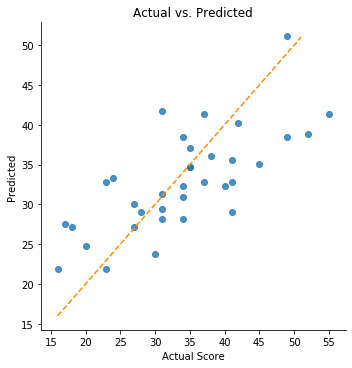

In [33]:
 # Plotting the actual vs predicted values
sns.lmplot(x='score', y='Predicted', data=df_results, fit_reg=False)
line_coords = np.arange(df_results.score.min().min(), df_results.Predicted.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.xlabel('Actual Score', size=10)
plt.title('Actual vs. Predicted')


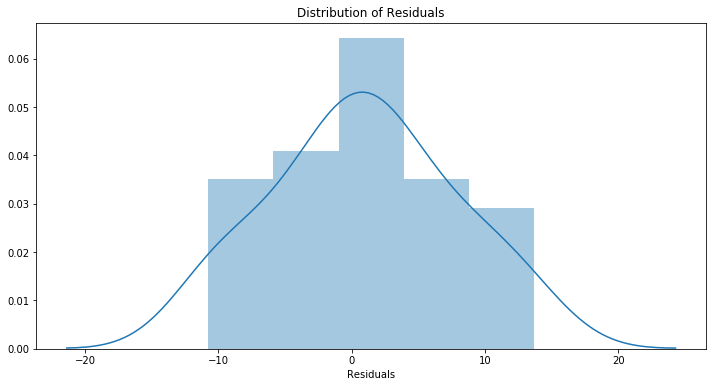

In [30]:
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [35]:
df2 = df[['2_game_avg', 'home_or_away', 'score']]
corr2 = df2.corr()

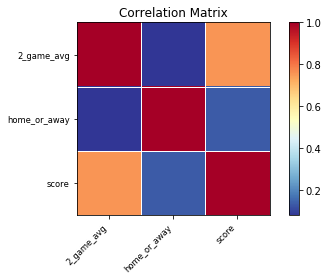

In [36]:
fig= plot_corr(corr2,xnames=corr2.columns)